In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
training_data = pd.read_csv('../Datasets/training_data_full.csv')

In [3]:
non_numerical_features = set([
    'StateAbbr',
    'StateDesc',
    'CityName',
    'CountyFIPS',
    'TractFIPS'
])

target_features = set([
    'diabetes_change_rate_2020'
])

numerical_features = list(
    set(training_data.columns) - non_numerical_features - target_features
)

In [4]:
features = training_data[numerical_features]
labels = training_data['diabetes_change_rate_2020']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [6]:
regr = RandomForestRegressor(max_depth=30, n_estimators=200,random_state=0, n_jobs=16, verbose=3)

In [7]:
history = regr.fit(X_train, Y_train)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    5.3s


building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200


[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   10.2s finished


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


Train R2 score is 0.89965
Test R2 score is 0.37963


[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.1s finished


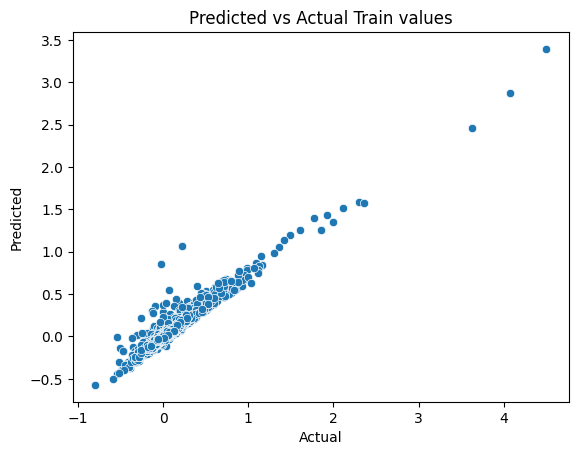

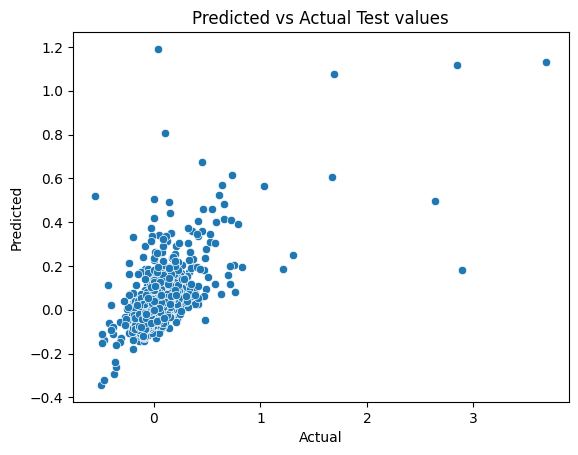

In [8]:
%run -i ./Model_Eval.ipynb
evaluate_regression_model(
    regr,
    None,
    X_train,
    Y_train,
    X_test,
    Y_test
)

In [9]:
regr.feature_importances_

array([0.03119523, 0.01720958, 0.02418723, 0.12307665, 0.01641727,
       0.01365989, 0.02743484, 0.01337961, 0.01957552, 0.01907069,
       0.01530338, 0.01959767, 0.01639531, 0.01709307, 0.01854921,
       0.02004485, 0.0174743 , 0.012593  , 0.013973  , 0.02226912,
       0.0112837 , 0.0242699 , 0.04174989, 0.01206228, 0.01998312,
       0.01335601, 0.03815341, 0.01311603, 0.0199248 , 0.02410267,
       0.01976717, 0.01948309, 0.02496345, 0.01726071, 0.01209463,
       0.03818685, 0.02332399, 0.0079877 , 0.02518094, 0.05472658,
       0.0180402 , 0.02500321, 0.01748028])

<BarContainer object of 43 artists>

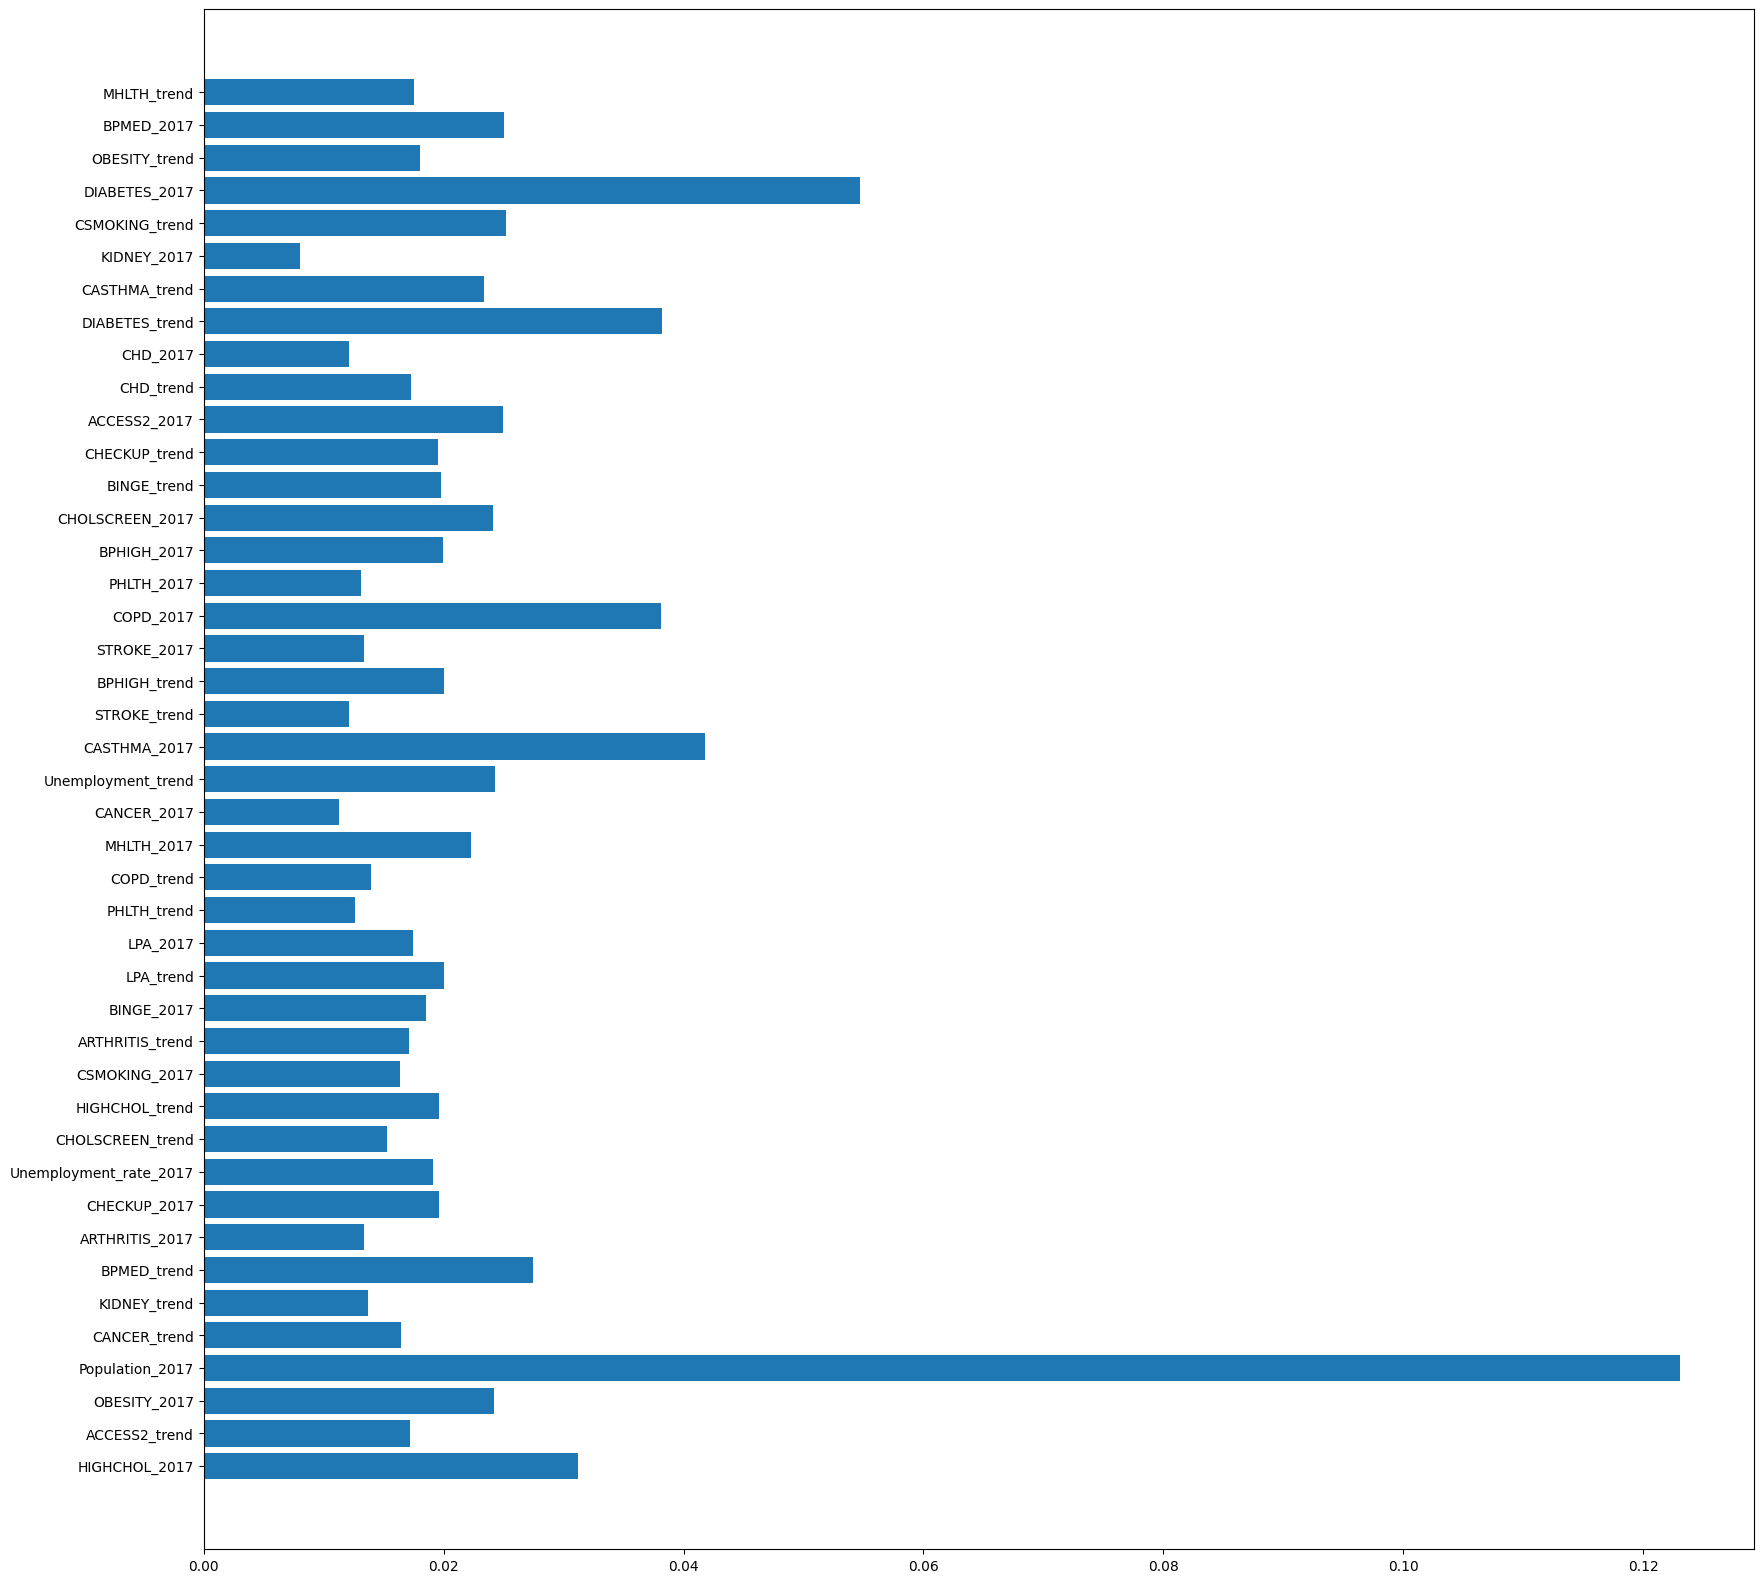

In [13]:
plt.figure(figsize=(20,20))
plt.barh(numerical_features, regr.feature_importances_)